In [472]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [473]:
valid_dataset = pd.read_csv("Dataset/preprocessed_datasetDec-10-2020.csv")

In [474]:
valid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1301 non-null   float64
 1   kurtosis_oxygen   1301 non-null   float64
 2   std_oxygen        1301 non-null   float64
 3   skewness_oxygen   1301 non-null   float64
 4   fnlwgt            1301 non-null   float64
 5   class             1301 non-null   float64
 6   mean_oxygen       1301 non-null   float64
 7   hours-per-week    1301 non-null   float64
 8   mean_glucose      1301 non-null   float64
 9   std_glucose       1301 non-null   float64
 10  kurtosis_glucose  1301 non-null   float64
 11  skewness_glucose  1301 non-null   float64
 12  pregnant          1301 non-null   float64
 13  sex_ Female       1301 non-null   float64
 14  sex_ Male         1301 non-null   float64
dtypes: float64(15)
memory usage: 152.6 KB


In [475]:
X = valid_dataset.drop("class", axis=1)
y = valid_dataset["class"]
# X = SelectKBest(score_func=mutual_info_regression, k=10).fit_transform(X, y)

In [476]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
X = X.filter(sfs.k_feature_names_)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_oxygen       1301 non-null   float64
 1   std_glucose       1301 non-null   float64
 2   kurtosis_glucose  1301 non-null   float64
 3   skewness_glucose  1301 non-null   float64
dtypes: float64(4)
memory usage: 40.8 KB


Accuracy 0.9720930232558139
                 Predicted Negative  Predicted Positive
Actual Negative                 321                   4
Actual Positive                   8                  97 

True Positives: 97 False Positives: 4 True Negatives: 321 False Negatives: 8 

FPR [0.         0.         0.         0.00307692 0.00307692 0.00615385
 0.00615385 0.00923077 0.00923077 0.01230769 0.01230769 0.01538462
 0.01538462 0.01846154 0.01846154 0.02153846 0.02153846 0.03076923
 0.03076923 0.15384615 0.15384615 0.24923077 0.24923077 0.25846154
 0.25846154 1.        ] 
TPR [0.         0.00952381 0.63809524 0.63809524 0.73333333 0.73333333
 0.78095238 0.78095238 0.91428571 0.91428571 0.92380952 0.92380952
 0.94285714 0.94285714 0.95238095 0.95238095 0.96190476 0.96190476
 0.97142857 0.97142857 0.98095238 0.98095238 0.99047619 0.99047619
 1.         1.        ] 
threshold 
threshold 
ROC-AUC 0.9907985347985347


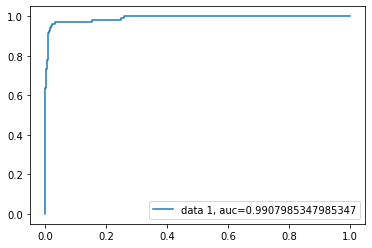

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
clf = LogisticRegression(penalty='l2', 
                         C=0.1, 
                         max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, 
                   columns=['Predicted Negative', 'Predicted Positive'], 
                   index=['Actual Negative', 'Actual Positive']), '\n')

tn, fp, fn, tp = cm.ravel()
print(f'True Positives: {tp}', 
      f'False Positives: {fp}', 
      f'True Negatives: {tn}',
      f'False Negatives: {fn}', '\n')

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('FPR', fpr, 
      '\nTPR', tpr, 
      '\nthreshold', 
      '\nthreshold',  
      '\nROC-AUC', auc)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc) )
plt.legend(loc=4)
plt.show()

In [478]:
cls = DecisionTreeClassifier(criterion='entropy')
cls.fit(X, y)


# display(SVG(graph.pipe(format='svg')))

DecisionTreeClassifier(criterion='entropy')

In [479]:
results = []
estimators = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    
    # Vytvoríme rozhodovací strom
    # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    clf = DecisionTreeClassifier(max_depth = i) 
    
    # natrenovanie modelu a predikovanie na trenovacej sade
    pred = clf.fit(X_train, y_train).predict(X_train) 
    
    # chyba na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) 
    
    # predickcia
    pred = clf.predict(X_test)
    
    # chyba na testovacej sade
    row['test'] = 1-accuracy_score(y_test, pred) 
    results.append(row)
    estimators.append(clf)

In [480]:
complexity_df = pd.DataFrame(results)
complexity_df.head(15)

,model_complexity,train,test
0,1,0.048220,0.039535
1,2,0.048220,0.039535
2,3,0.030999,0.039535
3,4,0.026406,0.034884


<AxesSubplot:xlabel='model_complexity'>

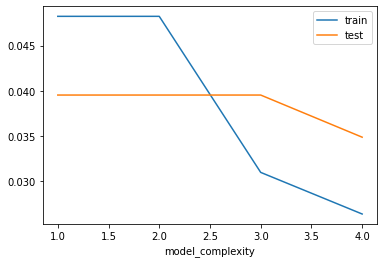

In [481]:
complexity_df.plot(x='model_complexity')

In [482]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("accuracy:", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred, average='micro'))
print("recall:", recall_score(y_test, pred, average='macro'))

print(classification_report(y_test, pred))

accuracy: 0.9651162790697675
precision: 0.9651162790697675
recall: 0.9511355311355312
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       325
         1.0       0.93      0.92      0.93       105

    accuracy                           0.97       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.97      0.97      0.97       430

